## Workflow to analyze Photometry data

### Imports

In [3]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *

### Variables

In [4]:
import pandas as pd

trial_window = [-2000, 6000] # in ms

# time limit around trigger to perform an event
# determine successful trials
timelim = [0, 2000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

# if working from the main notebook repo
basefolder, _ = os.path.split(os.getcwd())
# if working from the noncanonical notebook repo (comment if not the case)
basefolder, _ = os.path.split(basefolder)

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = os.path.join(basefolder,'params/tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\photometry'
video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'
basefolder

'c:\\Users\\phar0732\\Documents\\GitHub\\trialexp'

### Tasks
- A tasks definition file (.csv) contains all the information to perform the extractions of behaviorally relevant information from **PyControl** files, for each **task** file. It includes what are the **triggers** of different trial types, what **events** to extract (with time data), and what are events or printed lines that could be relevant to determine the **conditions** (e.g: free reward, optogenetic stimulation type, etc.)
- To analyze a new task you need to append task characteristics like **task** filename, **triggers**, **events** and **conditions**

In [3]:
tasks = pd.read_csv(tasksfile, usecols = [1,2,3,4], index_col = False)
tasks

,task,triggers,events,conditions
0,lick_go_nogo,go; nogo,bar; bar_off; spout,free_reward
1,lick_go_nogo_unconditionned,go; nogo,bar; bar_off; spout,free_reward
2,lick_go_nogo_unconditionned_opto,go; nogo,bar; bar_off; spout,free_reward
3,reaching_go_nogo,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
4,reaching_go_nogo_jc,CS_plus; CS_minus,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
5,reaching_go_nogo_opto_continuous,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset; s_go_sham; s_go_...
6,reaching_go_nogo_opto_sinusoid,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
7,reaching_go_nogo_opto_sinusoid_spout,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
8,reaching_go_nogo_reversal,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
9,reaching_go_nogo_reversal_incentive,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...


### Optional

Transfer Files from hierarchical folders by tasks to flat folders, for photometry and behaviour files

In [ ]:
# photo_root_dir = 'T:\\Data\\head-fixed\\pyphotometry\\data'
# pycontrol_root_dir = 'T:\\Data\\head-fixed\\pycontrol'

# root_folders = [photo_root_dir, pycontrol_root_dir]
# horizontal_folder_pycontrol = 'T:\\Data\\head-fixed\\test_folder\\pycontrol'
# horizontal_folder_photometry = 'T:\\Data\\head-fixed\\test_folder\\photometry'

# copy_files_to_horizontal_folders(root_folders, horizontal_folder_pycontrol, horizontal_folder_photometry)

### Create an experiment object

This will include all the pycontrol files present in the folder_path directory (do not include subdirectories)

In [34]:
# Folder of a full experimental batch, all animals included

# Enter absolute path like this
pycontrol_files_path = r'T:\Data\head-fixed\test_folder\pycontrol'

# or this if you want to use data from the sample_data folder within the package
# pycontrol_files_path = os.path.join(basefolder,'sample_data/pycontrol')
# pycontrol_files_path = r'T:\Data\head-fixed\kms_pycontrol'

# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(pycontrol_files_path, verbose=True)

# Only use if the Experiment cohort as been processed by trials before
# TODO: assess whether this can be removed or not
exp_cohort.by_trial = True

Saved sessions loaded from: sessions.pkl
Loading new data files..
Unable to import file: test-2021-08-03-182450.txt
invalid literal for int() with base 10: ''
Unable to import file: sdfds-2021-08-12-124623.txt
invalid literal for int() with base 10: ''
Unable to import file: test-2021-08-03-192212.txt
invalid literal for int() with base 10: ''
Unable to import file: test-2021-07-18-125133.txt
invalid literal for int() with base 10: ''
Unable to import file: sdfds-2021-08-12-123200.txt
invalid literal for int() with base 10: ''
Unable to import file: 001-2020-04-01-160045.txt

Unable to import file: 001-2020-04-01-153321.txt

Unable to import file: test-2021-08-03-184800.txt
invalid literal for int() with base 10: ''
Unable to import file: test-2021-08-03-181615.txt
invalid literal for int() with base 10: ''
Unable to import file: sdfds-2021-08-12-124202.txt
invalid literal for int() with base 10: ''
Unable to import file: sdfds-2021-08-12-124822.txt
invalid literal for int() with base 

In [29]:
from copy import deepcopy
exp_cohort_subset = deepcopy(exp_cohort)

subjects_subset = [280, 282, 299, 300, 301, 284, 285, 296, 297, 306, 307]
# Take only sessions where the task is 'reaching_go_nogo' and which have matching photometry files
exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'reaching_go_nogo') 
    and (session.photometry_rsync is not None)
    and (session.files['mp4'] is not [])
    and (session.subject_ID in subjects_subset)]

exp_cohort_subset.by_trial = True

print(len(exp_cohort_subset.sessions))

68


In [36]:
# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)

# Find matching videos
exp_cohort.match_sessions_to_files(video_dir, ext='mp4')

# Find matching DeepLabCut outputs files
exp_cohort.match_sessions_to_files(video_dir, ext='h5')

exp_cohort.save()


c:\users\phar0732\documents\github\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)
c:\Users\phar0732\.conda\envs\trialexp\lib\site-packages\sklearn\mixture\_base.py:131: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  cluster.KMeans(
c:\users\phar0732\documents\github\trialexp\trialexp\utils\rsync.py:100: RuntimeWarning: All-NaN slice encountered
  order_OK = ((np.nanmin(np.diff(cor_times_A)) > 0) and
c:\Users\phar0732\.conda\envs\trialexp\lib\site-packages\sklearn\mixture\_base.py:131: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  cluster.KMeans(
c:\users\phar0732\documents\github\trialexp\trialexp\utils\rsync.py:100: RuntimeWarning: All-NaN slice encountered
  order_OK = ((np.nanmin(np.diff(cor_times_A)) > 0) and


saved T:\Data\head-fixed\test_folder\pycontrol\sessions.pkl


### Perform extraction of behavioural information by trial

In [38]:
# Process the whole experimental folder by trials
exp_cohort.process_exp_by_trial(trial_window, timelim, tasksfile, blank_spurious_event='spout', blank_timelim=[0, 65], verbose=True)

# Save the file as sessions.pkl in folder_path
exp_cohort.save()

file too short to process (likely aborted session):                 1 2021-06-22 10:53:45 reaching_test
processing by trial: 01test-2021-07-05-124108.txt task: 12to5test
No trial '' found: 01test-2021-07-05-124108.txt task: 12to5test
processing by trial: 01test-2021-07-05-140037.txt task: 12to5test
No trial '' found: 01test-2021-07-05-140037.txt task: 12to5test
processing by trial: 01test-2021-07-05-140146.txt task: 12to5test
No trial '' found: 01test-2021-07-05-140146.txt task: 12to5test
processing by trial: JCPR277G-2021-07-17-184332.txt task: reaching_yp
processing by trial: JCPR277G-2021-07-18-130903.txt task: reaching_yp
processing by trial: JCPR277G-2021-07-18-130959.txt task: reaching_yp
file too short to process (likely aborted session):                 277 2021-07-18 13:48:23 open_solenoid
file too short to process (likely aborted session):                 277 2021-07-18 13:51:45 camera_trigger_test
file too short to process (likely aborted session):                 277 2021-0

### Match with photometry, videos, and DeepLabCut files

The following Warning : 

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads...

is due to rsync function for photometry-pycontrol alignment


### Define conditions and groups for extraction

In [37]:
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'CS_Go', 'valid': True, 'success': True, 'error bar_off': False, 'reward free': False, 'button_press': False}
conditions_dict2 = {'trigger': 'CS_Go', 'valid': True, 'success': False, 'reward free': False, 'button_press': False}
conditions_dict3 = {'trigger': 'CS_Go', 'valid': True, 'success': True, 'error bar_off': True, 'reward free': False, 'button_press': False}
conditions_dict4 = {'trigger': 'CS_NoGo', 'valid': True, 'success': True, 'button_press': False}
conditions_dict5 = {'trigger': 'CS_NoGo', 'valid': True, 'success': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict1, conditions_dict2, conditions_dict3, conditions_dict4, conditions_dict5]
# Aliases for conditions
cond_aliases = ['Go hit', 'Go miss', 'Go hit error', 'NoGo hit', 'NoGo miss']
# Groups as a list of lists
groups = [[280, 282, 299, 300, 301],\
    [284, 285, 296, 297, 306, 307]]
# Window to exctract (in ms)
trial_window = [-2000, 6000]

### Extract Photometry trials and create a Continuous_Dataset

In [39]:
groups = [280, 282, 299, 300, 301, 284, 285, 296, 297, 306, 307]

cont_dataset = exp_cohort.get_photometry_groups(
        groups = groups, # or use groups variable defined above
        conditions_list = condition_list, 
        cond_aliases = cond_aliases, 
        when = 'all', 
        task_names = 'reaching_go_nogo', #'reaching_go_nogo',
        trig_on_ev = None, # align to the first event of a kind e.g. bar_off
        high_pass = None, 
        low_pass = 100, 
        median_filt = 3,
        motion_corr = True, 
        df_over_f = True, 
        downsampling_factor = 5, 
        export_vars = ['analog_1_filt','analog_2_filt','analog_1_df_over_f'], 
        remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
        verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True

# cont_dataset.set_trial_window(trial_window, 'ms')


Processing subject 280 at: 2021-12-03 10:41:38
condition 0 trials: 92
condition 1 trials: 7
condition 2 trials: 0
condition 3 trials: 30
condition 4 trials: 4
Processing subject 282 at: 2021-12-03 09:53:26
condition 0 trials: 92
condition 1 trials: 20
condition 2 trials: 0
condition 3 trials: 55
condition 4 trials: 0
Processing subject 299 at: 2022-05-09 12:03:50
condition 0 trials: 22
condition 1 trials: 51
condition 2 trials: 0
condition 3 trials: 0
condition 4 trials: 0
Processing subject 299 at: 2022-05-10 12:08:04
condition 0 trials: 82
condition 1 trials: 51
condition 2 trials: 5
condition 3 trials: 5
condition 4 trials: 1
Processing subject 299 at: 2022-05-11 12:52:33
condition 0 trials: 95
condition 1 trials: 34
condition 2 trials: 14
condition 3 trials: 26
condition 4 trials: 1
Processing subject 299 at: 2022-05-12 12:46:53
condition 0 trials: 79
condition 1 trials: 19
condition 2 trials: 4
condition 3 trials: 27
condition 4 trials: 5
Processing subject 299 at: 2022-05-13 09:0

### Save Photometry Dataset

In [40]:
folder_path = r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs'
cont_dataset.save(folder_path, 'photo_reaching_go_nogo_mf3_lp100_cs_onset')


Dataset saved in C:\Users\phar0732\Documents\GitHub\trialexp\outputs\photo_reaching_go_nogo_mf3_lp100_cs_onset.pkl
data size is 326.98988342285156 Mb


### Reload a pre-existing dataset

In [28]:
# dataset_full_path = r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs\photo_reaching_go_nogo_mf3_lp45_bar_off.pkl'
dataset_full_path = r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs\photo_reaching_gonogo_mf3_hp0.05_lp45.pkl'

cont_dataset = load_dataset(dataset_full_path)
cont_dataset.cond_aliases

['Go hit', 'Go miss', 'Go hit error', 'NoGo hit', 'NoGo miss']

In [7]:
from copy import deepcopy
cont_dataset_copy = deepcopy(cont_dataset)

In [52]:
nb_widths_cwt = 151
widths = np.arange(1,nb_widths_cwt)

frequencies = pywt.scale2frequency(wavelet_name, widths) /dt
frequencies

array([162.5       ,  81.25      ,  54.16666667,  40.625     ,
        32.5       ,  27.08333333,  23.21428571,  20.3125    ,
        18.05555556,  16.25      ,  14.77272727,  13.54166667,
        12.5       ,  11.60714286,  10.83333333,  10.15625   ,
         9.55882353,   9.02777778,   8.55263158,   8.125     ,
         7.73809524,   7.38636364,   7.06521739,   6.77083333,
         6.5       ,   6.25      ,   6.01851852,   5.80357143,
         5.60344828,   5.41666667,   5.24193548,   5.078125  ,
         4.92424242,   4.77941176,   4.64285714,   4.51388889,
         4.39189189,   4.27631579,   4.16666667,   4.0625    ,
         3.96341463,   3.86904762,   3.77906977,   3.69318182,
         3.61111111,   3.5326087 ,   3.45744681,   3.38541667,
         3.31632653,   3.25      ,   3.18627451,   3.125     ,
         3.06603774,   3.00925926,   2.95454545,   2.90178571,
         2.85087719,   2.80172414,   2.75423729,   2.70833333,
         2.66393443,   2.62096774,   2.57936508,   2.53

In [32]:
cont_dataset.set_trial_window([-2000, 6000])

In [96]:
import pywt
from matplotlib import pyplot as plt

var_name = 'analog_1_df_over_f'
chan_idx = cont_dataset.colnames_dict[var_name]
wavelet_name = 'mexh'

nb_widths_cwt = int(cont_dataset.sampling_rate+1)
dt = 1/cont_dataset.sampling_rate # 100 Hz sampling
widths = np.arange(1,nb_widths_cwt)

data_time_vector = cont_dataset.get_time_vector()
# compute spectrogram frequencies
frequencies = pywt.scale2frequency(wavelet_name, widths) /dt
# set boundaries for spectrogram display
extent = [data_time_vector[0], data_time_vector[-1], frequencies.min(), frequencies.max()]

data = cont_dataset.data[:,chan_idx,:].squeeze()

# removing mean of each trial
data = (data.T - data.mean(1)).T

# performing wavelet transform
spec_gram, freqs = pywt.cwt(data, widths, wavelet_name, axis=0)




### Mexican Hat wavlet

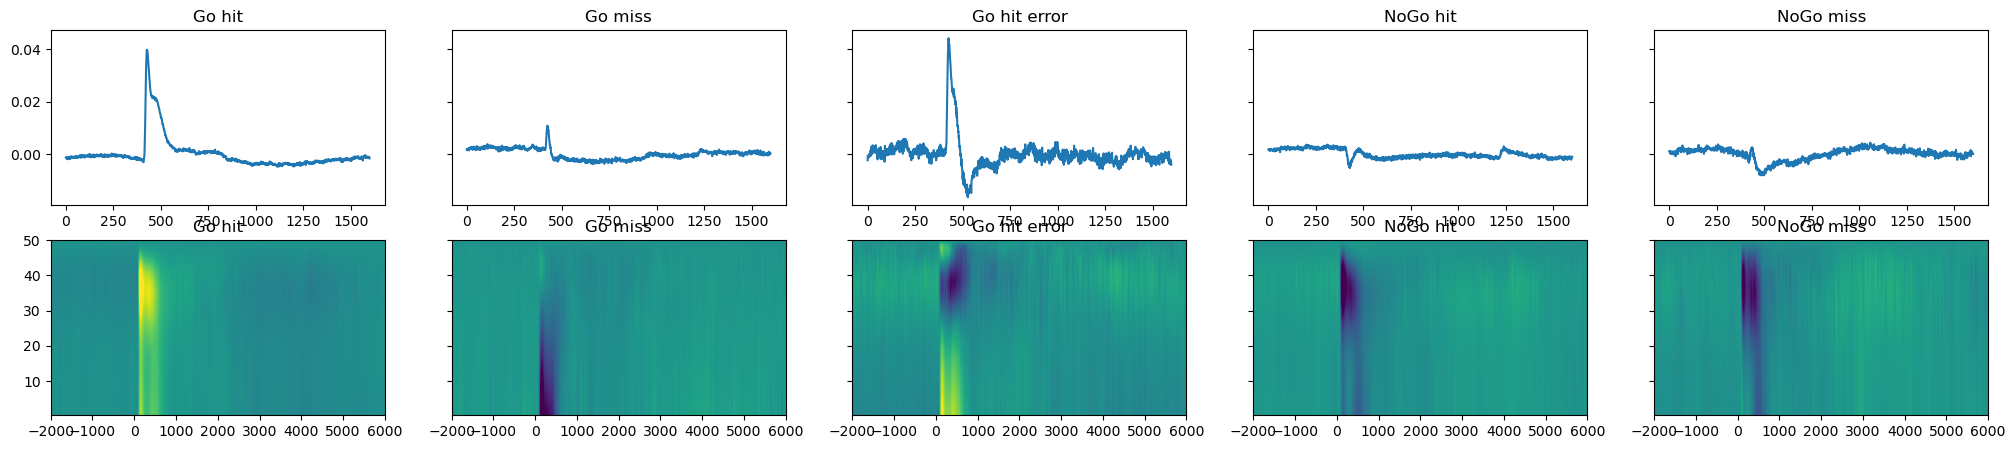

In [97]:
# averaging spectrogram for all trials
mean_spectrogram = spec_gram[:,:,:].mean(1)

vmin = np.percentile(spec_gram,2)
vmax = np.percentile(spec_gram,98)

# Create a figure
fig = plt.figure(figsize=(5*len(cont_dataset.cond_aliases),5))

axes = fig.subplots(2, len(cont_dataset.cond_aliases), sharey='row')

for cond_idx, cond_alias in enumerate(cont_dataset.cond_aliases):

    trial_idx_cond = cont_dataset.metadata_df[cont_dataset.metadata_df.condition_ID == cond_idx].index.values

    cond_spectrogram = spec_gram[:,trial_idx_cond,:].mean(1)      

    axes[1,cond_idx].imshow(cond_spectrogram, extent=extent, interpolation=None, aspect='auto',resample=False, vmin=vmin, vmax=vmax)
    axes[1,cond_idx].set_title(cond_alias)

    axes[0,cond_idx].plot(data[trial_idx_cond].mean(0))
    axes[0,cond_idx].set_title(cond_alias)


### Morlet Wavelet

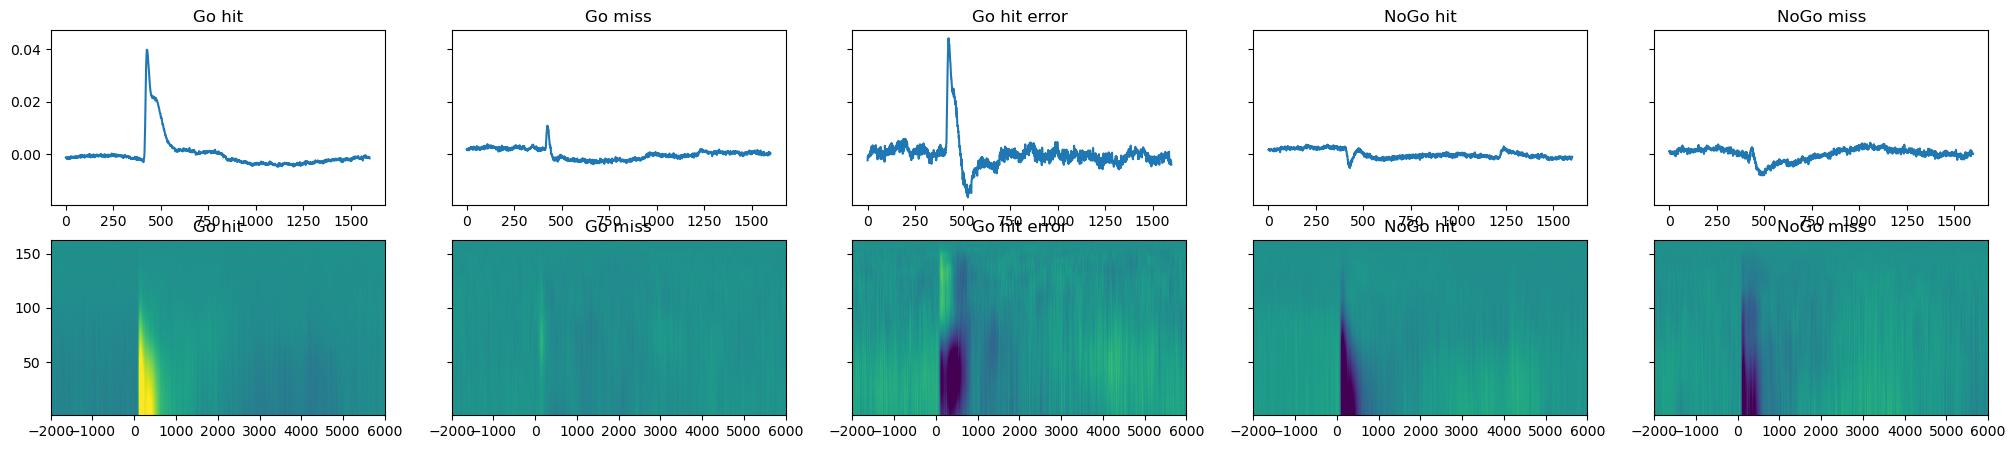

In [58]:
# averaging spectrogram for all trials
mean_spectrogram = spec_gram[:,:,:].mean(1)

vmin = np.percentile(spec_gram,2)
vmax = np.percentile(spec_gram,98)

# Create a figure
fig = plt.figure(figsize=(5*len(cont_dataset.cond_aliases),5))

axes = fig.subplots(2, len(cont_dataset.cond_aliases), sharey='row')

for cond_idx, cond_alias in enumerate(cont_dataset.cond_aliases):

    trial_idx_cond = cont_dataset.metadata_df[cont_dataset.metadata_df.condition_ID == cond_idx].index.values

    cond_spectrogram = spec_gram[:,trial_idx_cond,:].mean(1)      

    axes[1,cond_idx].imshow(cond_spectrogram, extent=extent, interpolation=None, aspect='auto',resample=False, vmin=vmin, vmax=vmax)
    axes[1,cond_idx].set_title(cond_alias)

    axes[0,cond_idx].plot(data[trial_idx_cond].mean(0))
    axes[0,cond_idx].set_title(cond_alias)


(12,) (251,) (8929, 251, 12)


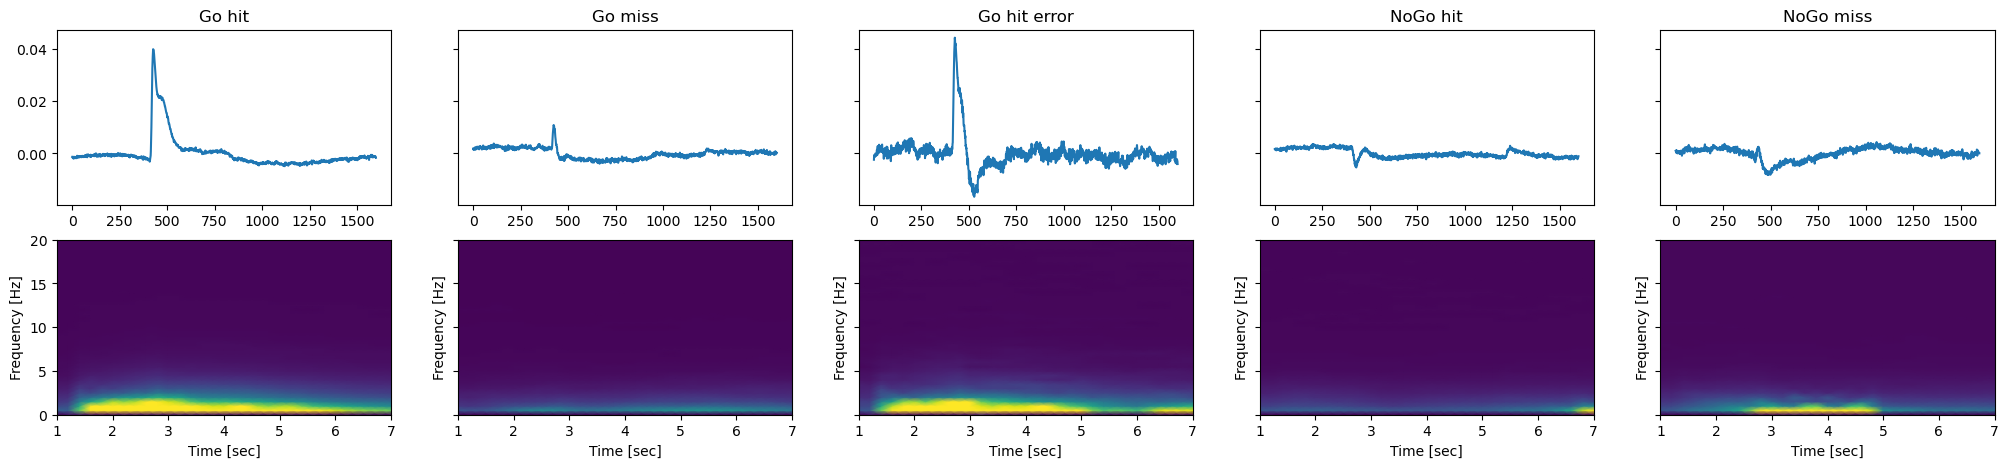

In [94]:
from scipy import signal
fs = 200
f, t, spec_gram = signal.spectrogram(data, fs, nperseg=400, noverlap=360, scaling='density')

spec_gram = np.swapaxes(spec_gram,0,1)

mean_spectrogram = spec_gram[:,:,:].mean(1)

vmin = np.percentile(spec_gram,0.01)
vmax = np.percentile(spec_gram,99.7)

# Create a figure
fig = plt.figure(figsize=(5*len(cont_dataset.cond_aliases),5))

axes = fig.subplots(2, len(cont_dataset.cond_aliases), sharey='row')

for cond_idx, cond_alias in enumerate(cont_dataset.cond_aliases):

    trial_idx_cond = cont_dataset.metadata_df[cont_dataset.metadata_df.condition_ID == cond_idx].index.values

    cond_spectrogram = spec_gram[:,trial_idx_cond,:].mean(1)      


    axes[0,cond_idx].plot(data[trial_idx_cond].mean(0))
    axes[0,cond_idx].set_title(cond_alias)
    
    axes[1,cond_idx].pcolormesh(t, f, cond_spectrogram, shading='gouraud', vmin=vmin, vmax=vmax)
    axes[1,cond_idx].set_ylabel('Frequency [Hz]')
    axes[1,cond_idx].set_xlabel('Time [sec]')
    axes[1,cond_idx].set_ylim([0,20])


In [72]:
cont_dataset.cond_aliases

['Go hit', 'Go miss', 'Go hit error', 'NoGo hit', 'NoGo miss']

In [111]:
!pip install emd
import emd

sample_rate = 200
data_emd = data[trial_idx_cond[2],:]
# Run a mask sift
imf = emd.sift.mask_sift(data_emd, max_imfs=5)

emd.plotting.plot_imfs(imf[:sample_rate*3, :])

     ---------------------------------------- 83.1/83.1 kB ? eta 0:00:00
     ---------------------------------------- 77.8/77.8 kB ? eta 0:00:00
     ---------------------------------------- 42.0/42.0 kB ? eta 0:00:00
     --------------------------------------- 14.0/14.0 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\phar0732\\.conda\\envs\\trialexp\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'emd'

In [106]:
trial_idx_cond = cont_dataset.metadata_df[cont_dataset.metadata_df.condition_ID == 0].index
trial_idx_cond

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8832, 8833, 8834, 8835, 8836, 8837, 8838, 8839, 8840, 8841],
           dtype='int64', length=3976)

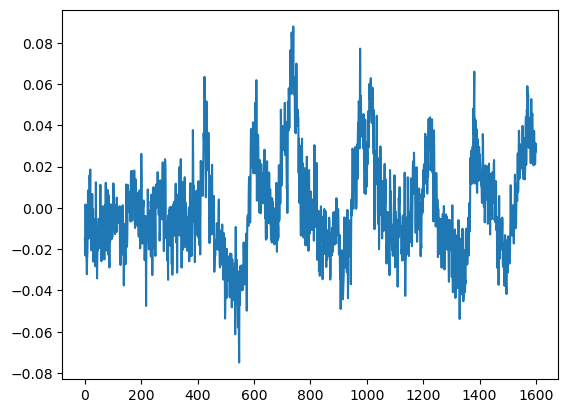

In [110]:

plt.show()

### Eliminate outliers from the dataset

### Optional methods

In [80]:
# Get a list of the groups
cont_dataset.get_groups()
# Get a list of the variables
cont_dataset.get_col_names()

# reset previous filtering of the dataset
cont_dataset.filter_reset()

# exclude some conditions by IDs
cont_dataset.filterout_conditions([])

# exclude some groups by IDs
cont_dataset.filterout_groups([])

# exclude some subjects
cont_dataset.filterout_subjects([0,1, 52])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])

# filter subjects/sessions with less than x trials (by condition)
# cont_dataset.filter_min(min_trials = 7)

# Keep only last n sessions
cont_dataset.filter_lastNsessions(n = 3)

# Filter artifacted trials
# cont_dataset.filterout_clusters([-1, 1, 2]) # Good cluster is classically 0

# Exclude sessions by dates
# cont_dataset.filterout_dates(days_to_exclude = )

# To remove subjects who do not have
# trials in all the conditions
# Careful when using on sessions when not all conditions are present, 
# it could exclude a big number of whole sessions
# cont_dataset.filter_if_not_in_all_cond()


### Plot the photometry by condition

True    7168
Name: keep, dtype: int64

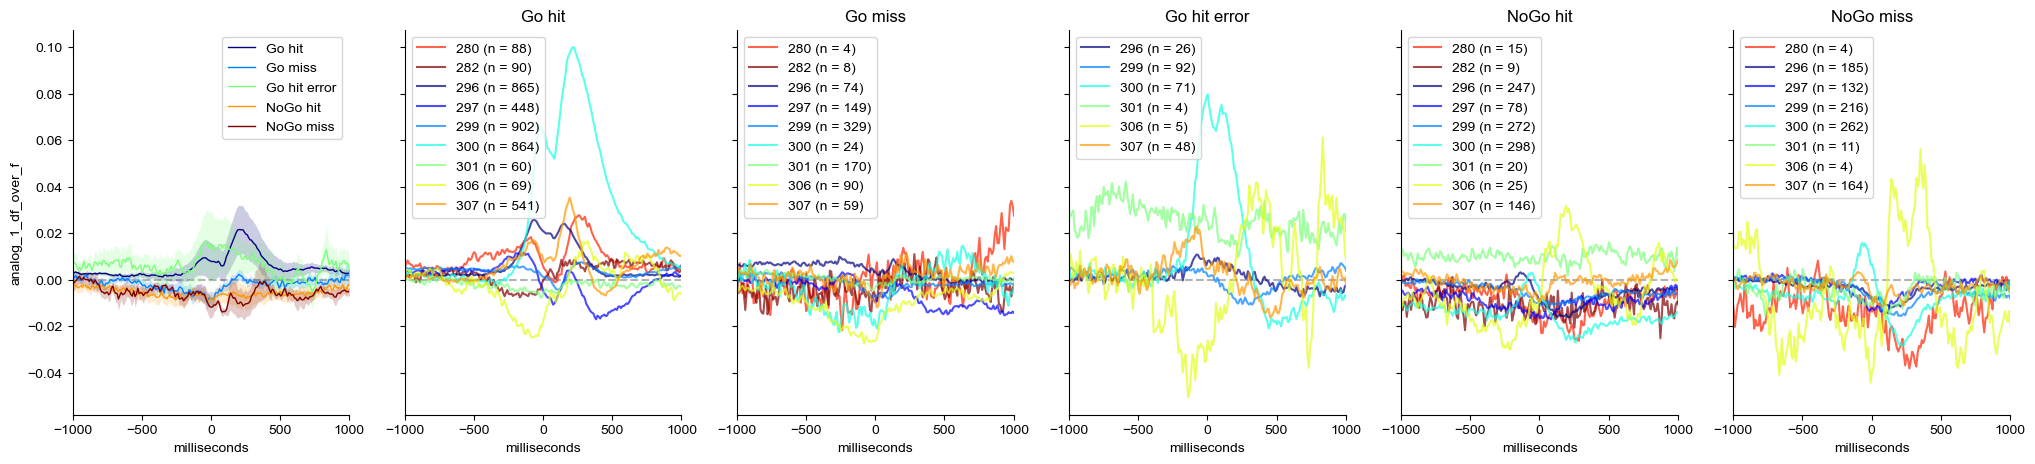

In [96]:
# if this was not set at creation
cont_dataset_copy.set_trial_window([-2, 6], 's')

cont_dataset_copy.lineplot(
    vars = ['analog_1_df_over_f'],
    time_lim = [-1000, 1000],
    time_unit = 'milliseconds',
    ylim =  None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    error = True,
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (25, 5),
    dpi = 100,
    verbose = False)

# Return a count of overall number of trials
cont_dataset.metadata_df['keep'].value_counts()



## Preparing data for model

In [133]:
X, y = cont_dataset_copy.export_to_sktime(
    folder = r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs',
    name = 'reaching_go_nogo',
    vars_to_export = 'analog_1_df_over_f',
    verbose = True)

Nested Dataframe saved in C:\Users\phar0732\Documents\GitHub\trialexp\outputs\reaching_go_nogo.pkl
sktime-format data size: 85.80049133300781 Mb


In [9]:
X, y = load_sktime_dataset(r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs\reaching_go_nogo.pkl')

In [25]:
dataset = load_dataset(
    r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs\photo_reaching_go_nogo_mf3_lp45_bar_off_outliers_removed.pkl')

In [31]:
dataset.data.shape

(7020, 3, 800)

In [45]:
dataset.metadata_df.condition_ID.value_counts()

0    3885
3    1089
4     968
1     835
2     243
Name: condition_ID, dtype: int64

In [36]:
X,y = dataset.export_to_sktime(vars_to_export='analog_1_df_over_f')

In [37]:
X.shape

(7020, 800)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sktime.datatypes import get_examples
from sktime.datatypes import convert

convert(X, from_type="Panel", to_type="Series")
from sktime.datatypes import check_is_mtype

ValueError: Series is not a supported mtype

### Features Extraction

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sktime.pipeline import make_pipeline
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

tsfresh_trafo = TSFreshFeatureExtractor(default_fc_parameters="minimal")
randf = RandomForestClassifier(n_estimators=100)
pipe = make_pipeline(tsfresh_trafo, randf)

In [41]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)
accuracy_score(y_train, y_pred)

C:\Users\phar0732\AppData\Roaming\Python\Python38\site-packages\sktime\datatypes\_panel\_convert.py:712: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa
Feature Extraction: 100%|██████████| 5616/5616 [00:04<00:00, 1153.04it/s]
C:\Users\phar0732\AppData\Roaming\Python\Python38\site-packages\sktime\datatypes\_panel\_convert.py:712: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa
Feature Extraction: 100%|██████████| 5616/5616 [00:05<00:00, 1088.38it/s]


1.0

In [42]:
y_test_pred = pipe.predict(X_test)
accuracy_score(y_test, y_test_pred)

C:\Users\phar0732\AppData\Roaming\Python\Python38\site-packages\sktime\datatypes\_panel\_convert.py:712: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa
Feature Extraction: 100%|██████████| 1404/1404 [00:01<00:00, 1172.40it/s]


0.5548433048433048